<a href="https://colab.research.google.com/github/master-PA/Credit-Approval-ML-model/blob/main/Credit_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [50]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_record.csv')
lable = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/credit_record.csv')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [51]:
lable

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [52]:
data = data.merge(lable, on='ID', how='left')
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN,NaN
1179811,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
1179812,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN,NaN


In [53]:
data.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE
count,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,1179815.0,1.179815e+06,1.179815e+06,1.179815e+06,1.179815e+06,777715.000000
mean,5.429449e+06,4.277560e-01,1.882163e+05,-1.608234e+04,5.876616e+04,1.0,2.224645e-01,2.962507e-01,9.788060e-02,2.203816e+00,-19.373564
std,5.748228e+05,7.381708e-01,1.048445e+05,4.131930e+03,1.373000e+05,0.0,4.159017e-01,4.566031e-01,2.971533e-01,9.035046e-01,14.082208
min,5.008804e+06,0.000000e+00,2.610000e+04,-2.520100e+04,-1.753100e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-60.000000
25%,5.061203e+06,0.000000e+00,1.215000e+05,-1.947300e+04,-3.242000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-29.000000
50%,5.115961e+06,0.000000e+00,1.620000e+05,-1.571100e+04,-1.617000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,-17.000000
75%,5.769826e+06,1.000000e+00,2.250000e+05,-1.264600e+04,-4.120000e+02,1.0,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,-8.000000
max,7.999952e+06,1.900000e+01,6.750000e+06,-7.489000e+03,3.652430e+05,1.0,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+01,0.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179815 entries, 0 to 1179814
Data columns (total 20 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ID                   1179815 non-null  int64  
 1   CODE_GENDER          1179815 non-null  object 
 2   FLAG_OWN_CAR         1179815 non-null  object 
 3   FLAG_OWN_REALTY      1179815 non-null  object 
 4   CNT_CHILDREN         1179815 non-null  int64  
 5   AMT_INCOME_TOTAL     1179815 non-null  float64
 6   NAME_INCOME_TYPE     1179815 non-null  object 
 7   NAME_EDUCATION_TYPE  1179815 non-null  object 
 8   NAME_FAMILY_STATUS   1179815 non-null  object 
 9   NAME_HOUSING_TYPE    1179815 non-null  object 
 10  DAYS_BIRTH           1179815 non-null  int64  
 11  DAYS_EMPLOYED        1179815 non-null  int64  
 12  FLAG_MOBIL           1179815 non-null  int64  
 13  FLAG_WORK_PHONE      1179815 non-null  int64  
 14  FLAG_PHONE           1179815 non-null  int64  
 15

In [55]:
data.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [56]:
data.duplicated().sum()

np.int64(0)

In [57]:
gender_income=data.groupby('CODE_GENDER')['AMT_INCOME_TOTAL'].mean()
gender_income

,AMT_INCOME_TOTAL
CODE_GENDER,
F,174173.859338
M,216550.962880


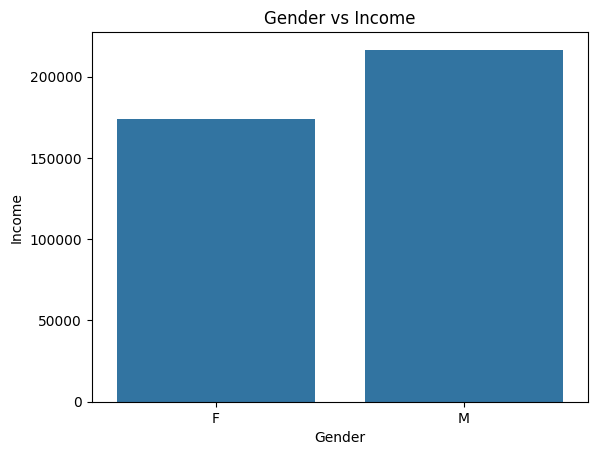

In [58]:
sns.barplot(x=gender_income.index, y=gender_income.values)
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

In [59]:
scaler = MinMaxScaler()
data['AMT_INCOME_TOTAL'] = scaler.fit_transform(data[['AMT_INCOME_TOTAL']])
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0.0,C
1,5008804,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1.0,C
2,5008804,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2.0,C
3,5008804,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3.0,C
4,5008804,M,Y,Y,0,0.059697,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,M,N,Y,0,0.016196,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN,NaN
1179811,6840222,F,N,N,0,0.011511,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
1179812,6841878,F,N,N,0,0.004149,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN
1179813,6842765,F,N,Y,0,0.006826,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN,NaN


In [60]:
lable_count=data['STATUS'].value_counts()
lable_count

,count
STATUS,
C,329536
0,290654
X,145950
1,8747
5,1527
2,801
3,286
4,214


In [61]:
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col].astype(str))
    data

In [62]:
data.fillna(data.mean(), inplace=True)

In [63]:
data.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [64]:
data['AGE_YEARS'] = (-data['DAYS_BIRTH'] / 365).astype(int)
data['DAYS_EMPLOYED'] = (-data['DAYS_EMPLOYED'] / 365).astype(int)
data['MONTHS_BALANCE'] = (-data['MONTHS_BALANCE'] / 12).astype(int)
data.drop(columns=['DAYS_BIRTH'], inplace=True)
data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE_YEARS
0,5008804,1,1,1,0,0.059697,4,1,0,4,12,1,1,0,0,18,2.0,0,6,32
1,5008804,1,1,1,0,0.059697,4,1,0,4,12,1,1,0,0,18,2.0,0,6,32
2,5008804,1,1,1,0,0.059697,4,1,0,4,12,1,1,0,0,18,2.0,0,6,32
3,5008804,1,1,1,0,0.059697,4,1,0,4,12,1,1,0,0,18,2.0,0,6,32
4,5008804,1,1,1,0,0.059697,4,1,0,4,12,1,1,0,0,18,2.0,0,6,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179810,6840104,1,0,1,0,0.016196,1,4,2,1,-1000,1,0,0,0,18,1.0,1,8,62
1179811,6840222,0,0,0,0,0.011511,4,4,3,1,8,1,0,0,0,8,1.0,1,8,43
1179812,6841878,0,0,0,0,0.004149,0,1,3,5,1,1,1,0,0,14,1.0,1,8,22
1179813,6842765,0,0,1,0,0.006826,1,4,1,1,-1000,1,0,0,0,18,2.0,1,8,59


In [65]:
data['AGE_YEARS'].value_counts().sort_index()

,count
AGE_YEARS,
20,1
21,163
22,3901
23,5720
24,9402
25,12186
26,15198
27,33499
28,32899


<Axes: >

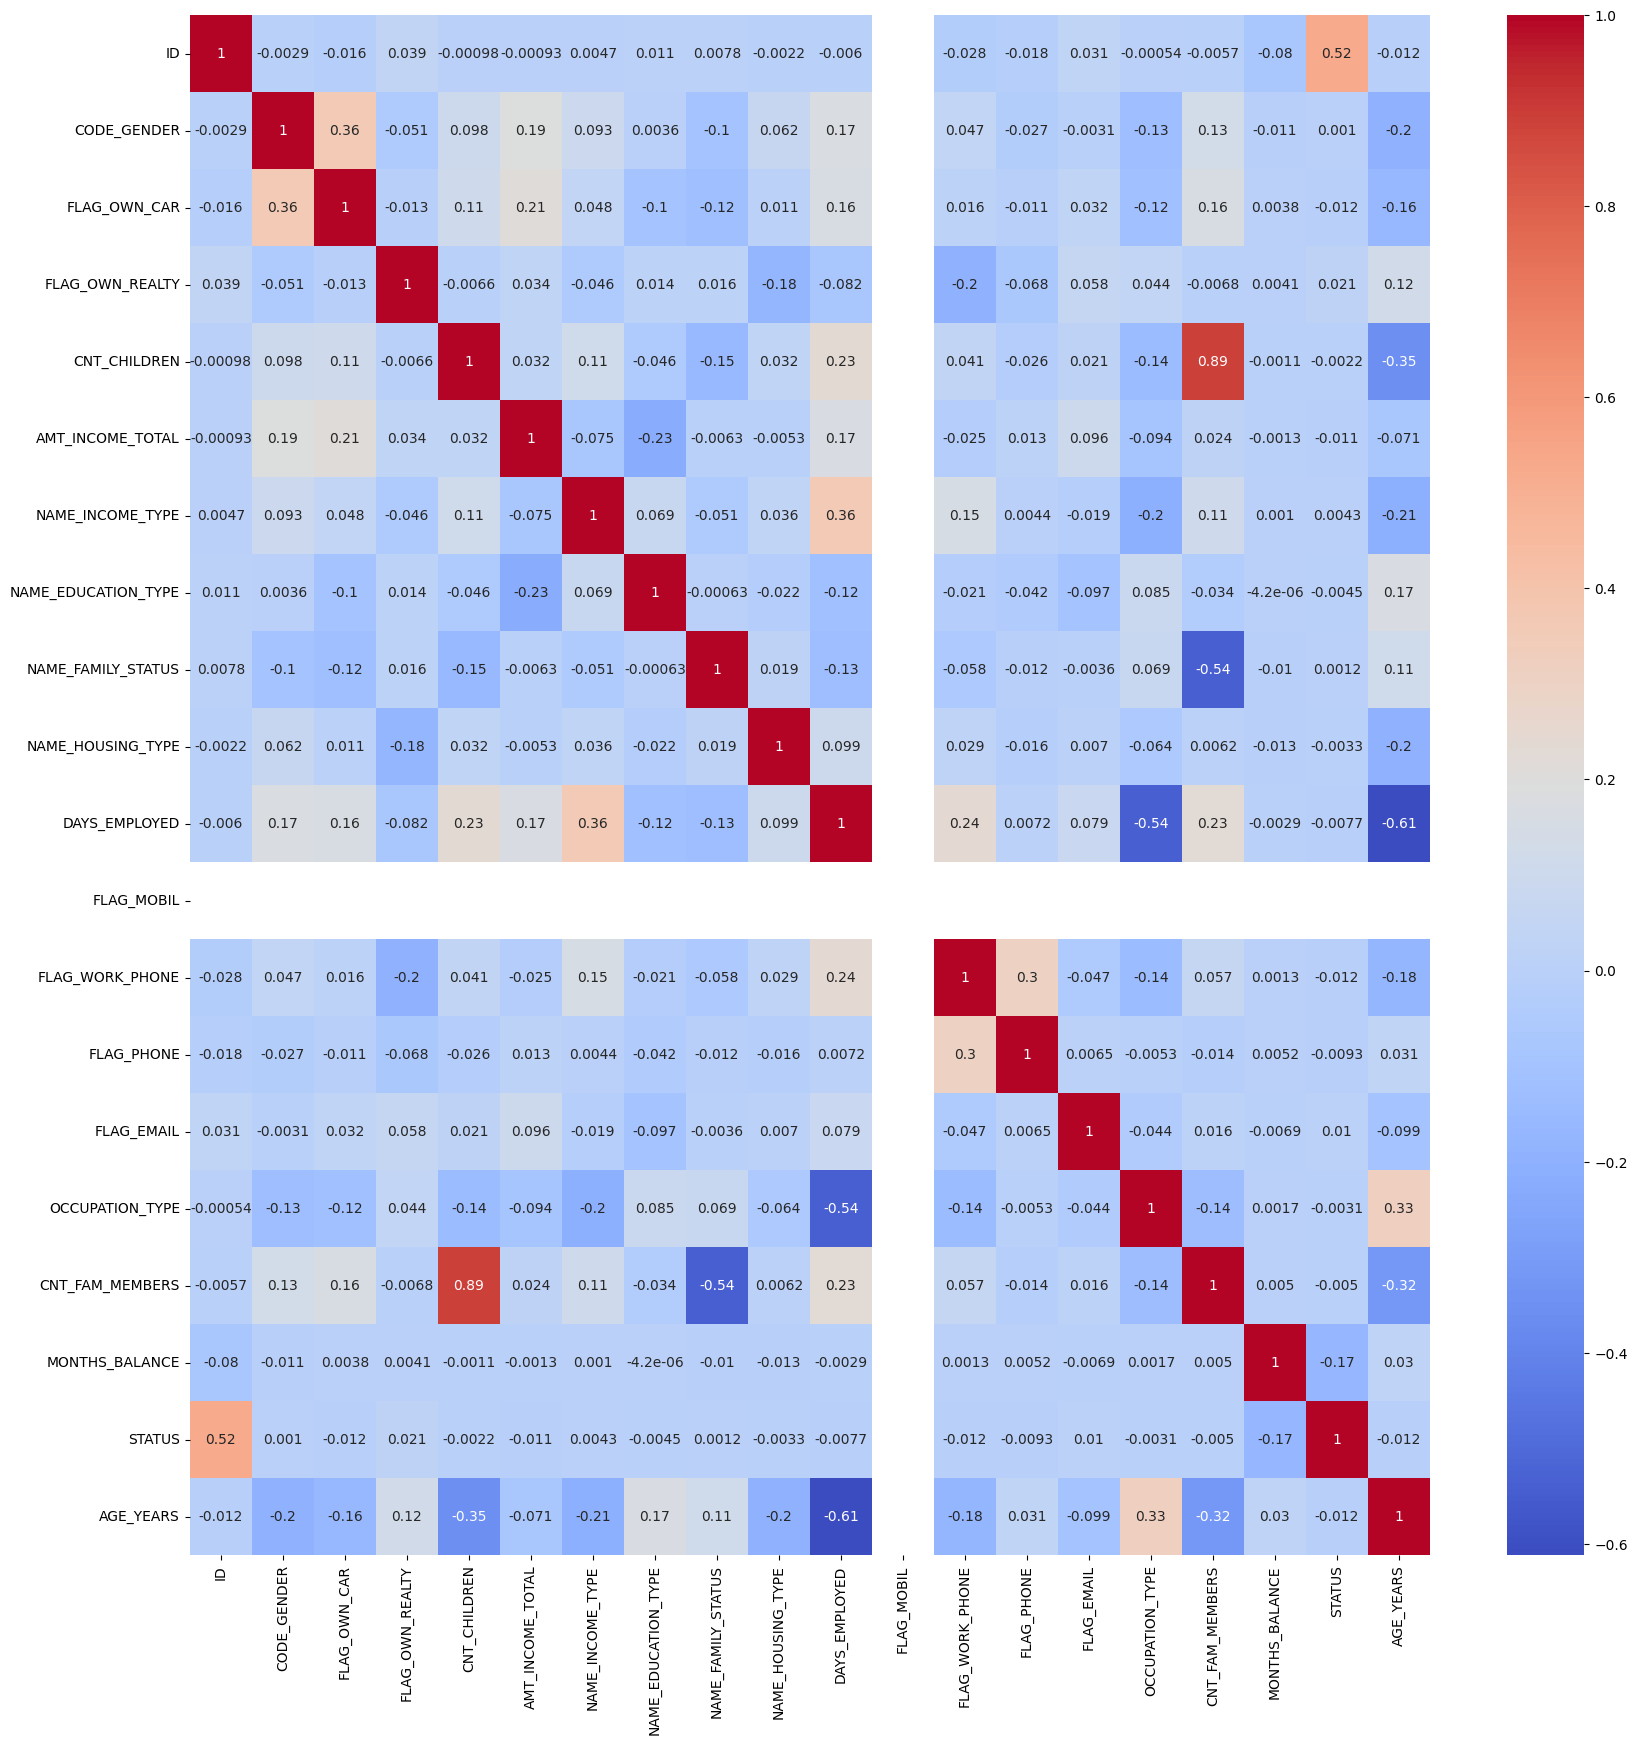

In [66]:
ig = plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [67]:
data['STATUS'].value_counts()

,count
STATUS,
8,402100
6,329536
0,290654
7,145950
1,8747
5,1527
2,801
3,286
4,214


In [68]:
data['Target'] = data['STATUS'].replace({'C': 0, 'X': 0}).astype(str)
data['Target'] = data['Target'].astype(int)
data['Target'] = (data['Target'] >= 3).astype(int)

<Axes: xlabel='Target'>

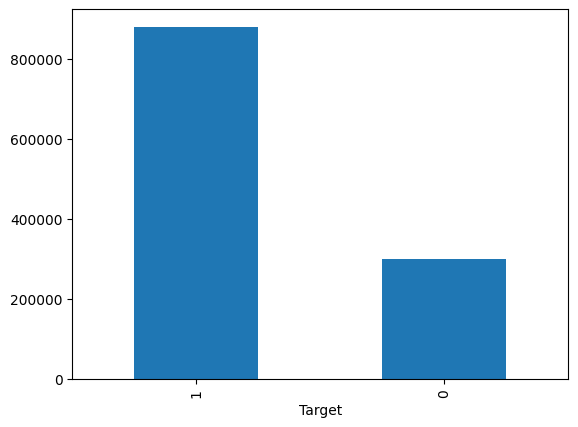

In [69]:
data['Target'].value_counts().plot(kind='bar')

In [70]:
target_counts = Counter(data['Target'])
print("Target value counts:", target_counts)

Target value counts: Counter({1: 879613, 0: 300202})


In [71]:
df_target0 = data[data['Target'] == 0]
df_target1 = data[data['Target'] == 1]

In [72]:
df_tsrget1 = df_target1.sample(n=len(df_target0), random_state=42)

In [73]:
df_tsrget1.shape

(300202, 21)

<Axes: xlabel='Target'>

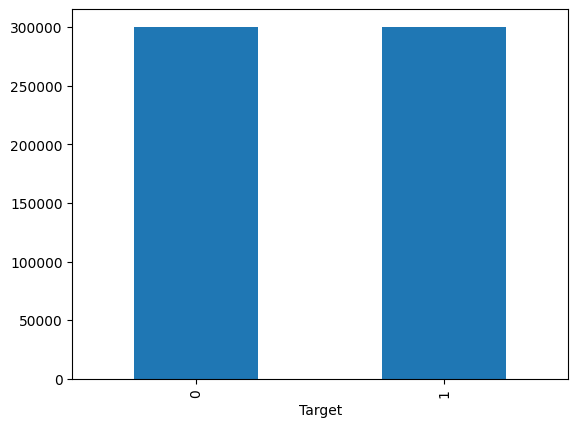

In [74]:
df = pd.concat([df_target0, df_tsrget1], axis=0)
df['Target'].value_counts().plot(kind='bar')

In [75]:
X = df.drop(columns=['Target', 'STATUS'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((480323, 19), (120081, 19), (480323,), (120081,))

In [76]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [77]:
model.score(X_test, y_test)

0.6361122908703292

In [78]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.9106269934460905

In [79]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix =confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     60041
           1       0.93      0.88      0.91     60040

    accuracy                           0.91    120081
   macro avg       0.91      0.91      0.91    120081
weighted avg       0.91      0.91      0.91    120081



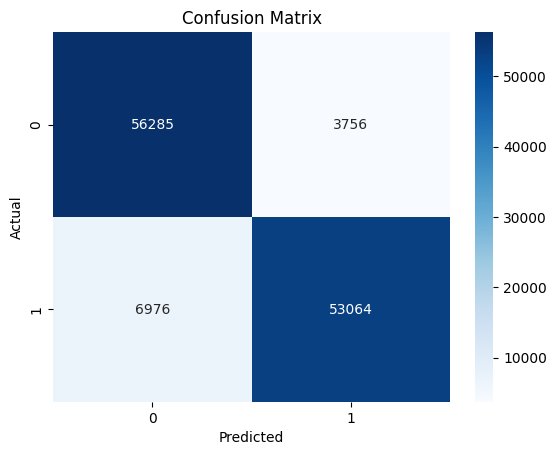

In [80]:
cm = confusion_matrix


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
dt_model.score(X_test, y_test)
from sklearn.metrics import classification_report, confusion_matrix
y_pred = dt_model.predict(X_test)
print(classification_report(y_test, y_pred))
confusion_matrix =confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     60041
           1       0.95      0.87      0.91     60040

    accuracy                           0.91    120081
   macro avg       0.91      0.91      0.91    120081
weighted avg       0.91      0.91      0.91    120081



In [84]:
import pickle
# Save the model to a file
with open('rf2_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)